In [1]:
# CALL FROM TERMINAL

# cd codes/utils/
# python identification.py --usefeat inception --subject subj01 --method cvpr

# Imports

In [7]:
import numpy as np
from tqdm import tqdm

# Functions

In [8]:
def load_feat_org(imgid, subject, method, usefeat, image_model_folder):
    
    #featdir = f'../../identification/{method}/{subject}/'
    featdir  = f'../../identification/' + image_model_folder + f'/{method}/{subject}'
    feat = np.load(f'{featdir}/{imgid:05}_org_{usefeat}.npy').flatten().squeeze()
    
    #print(f"Loaded Feature{f'{featdir}/{imgid:05}_org_{usefeat}.npy'}")
    return feat

def load_feat_gen(imgid, subject, method, usefeat,image_model_folder):
    
    #featdir = f'../../identification/{method}/{subject}'
    featdir  = f'../../identification/' + image_model_folder + f'/{method}/{subject}'
    
    nrep = 5

    feats_gen = []
    for rep in range(nrep):
        feat_gen = np.load(f'{featdir}/{imgid:05}_{rep:03}_{usefeat}.npy').flatten().squeeze()
        feats_gen.append(feat_gen)

    return feats_gen

# Model

In [9]:
subject = 'subj01'
method = 'cvpr'
# nimage = 982   # no of images to test on
#nimage = 499   # no of images to test on
nimage = 50   # no of images to test on

# image_model_folder =  'paper'     # Options : 'paper', 'lasso', 'net', 'netdecoded' 

# Accuracy Analysis

In [10]:
# for usefeat in ['inception', 'alexnet5', 'alexnet12', 'alexnet18']:
#['paper', 'lasso', 'net', 'netdecoded']
model_acc_dict = {}
for image_model_folder in ['paper', 'lasso', 'net', 'netdecoded']:
    
    acc_dict = {}
    for usefeat in ['alexnet5', 'alexnet12', 'alexnet18']:

        # Load all images
        print("Now Loading all images......")
        feat_orgs = []
        feat_gens = []
        for imgid in tqdm(range(nimage)):
            feat_org = load_feat_org(imgid, subject, method, usefeat, image_model_folder)
            feat_orgs.append(feat_org)

            feat_gen = load_feat_gen(imgid, subject, method, usefeat, image_model_folder)
            feat_gens.append(feat_gen)


        # Calculate similarity
        print("Now Calculating similarity......")
        rs_all = []
        for row in tqdm(range(nimage)):
            rs_row = []
            for col in range(nimage):
                feat_org = feat_orgs[row]  
                feat_gen = feat_gens[col]  
                r = np.corrcoef(feat_org,feat_gen)[0,1:]
                rs_row.append(r)
            rs_all.append(rs_row)

        # Calculate accuracy
        print("Now Calculating identification accuracy......")
        acc_all = []
        for imgid_org in tqdm(range(nimage)):
            # Calculate true R
            r_true = rs_all[imgid_org][imgid_org]

            # Calculate Fake R
            acc = []
            fakeimgs = list(range(nimage))
            fakeimgs.remove(imgid_org)
            for imgid_fake in fakeimgs:
                r_fake = rs_all[imgid_org][imgid_fake]
                acc.append(r_true.mean() > r_fake.mean())

            acc_all.append(sum(acc)/len(acc))
        acc_all = np.array(acc_all)

        print(f"\n\nAccuracy for Model : {usefeat}")
        print(f'{subject}_{usefeat}:\t ACC = {np.mean(acc_all):.03} ')
        acc_dict[usefeat] = np.round(np.mean(acc_all),3)
        
    model_acc_dict[image_model_folder] = acc_dict

Now Loading all images......


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 84.68it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  9.13it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2904.20it/s]




Accuracy for Model : alexnet5
subj01_alexnet5:	 ACC = 0.813 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 226.37it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 69.49it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2765.56it/s]




Accuracy for Model : alexnet12
subj01_alexnet12:	 ACC = 0.784 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 295.10it/s]


Now Calculating similarity......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 110.05it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2935.67it/s]




Accuracy for Model : alexnet18
subj01_alexnet18:	 ACC = 0.76 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 148.08it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  9.21it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2539.63it/s]




Accuracy for Model : alexnet5
subj01_alexnet5:	 ACC = 0.674 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 235.66it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 68.93it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2875.53it/s]




Accuracy for Model : alexnet12
subj01_alexnet12:	 ACC = 0.693 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 299.23it/s]


Now Calculating similarity......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 113.16it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2852.92it/s]




Accuracy for Model : alexnet18
subj01_alexnet18:	 ACC = 0.671 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 156.51it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  8.84it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2783.88it/s]




Accuracy for Model : alexnet5
subj01_alexnet5:	 ACC = 0.495 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 224.40it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 69.60it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2884.15it/s]




Accuracy for Model : alexnet12
subj01_alexnet12:	 ACC = 0.538 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 283.84it/s]


Now Calculating similarity......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 113.55it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 3017.40it/s]




Accuracy for Model : alexnet18
subj01_alexnet18:	 ACC = 0.52 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 155.63it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  8.98it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2869.74it/s]




Accuracy for Model : alexnet5
subj01_alexnet5:	 ACC = 0.841 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 225.84it/s]


Now Calculating similarity......


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 70.33it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2936.65it/s]




Accuracy for Model : alexnet12
subj01_alexnet12:	 ACC = 0.805 
Now Loading all images......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 288.86it/s]


Now Calculating similarity......


100%|██████████████████████████████████████████| 50/50 [00:00<00:00, 116.19it/s]


Now Calculating identification accuracy......


100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 2914.09it/s]



Accuracy for Model : alexnet18
subj01_alexnet18:	 ACC = 0.767 


# PLOT RESULTS

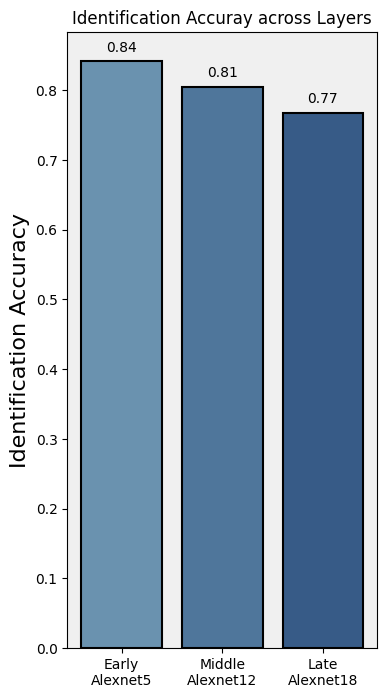

In [11]:
import matplotlib.pyplot as plt

# Data
values = [acc_dict['alexnet5'], acc_dict['alexnet12'], acc_dict['alexnet18']]
labels = ['Early\nAlexnet5', 'Middle\nAlexnet12', 'Late\nAlexnet18']

# Create parallel plot with rectangles and legends
plt.figure(figsize=(4, 8))

bars = []
for i, (value, label) in enumerate(zip(values, labels)):
    bar = plt.bar(i, value, color=['#6a92af', '#4f769b', '#375b87'][i], alpha=1, edgecolor='black', linewidth=1.5, label=label)
    bars.append(bar)

# Add data labels on top of the bars
for bar, value in zip(bars, values):
    plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xticks(range(len(labels)), labels, rotation = 0)
plt.ylabel('Identification Accuracy', fontsize=16)
plt.title('Identification Accuray across Layers')

# Add legend
#plt.legend()

# Add grid lines
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add background color
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.show()


# VISUALIZE

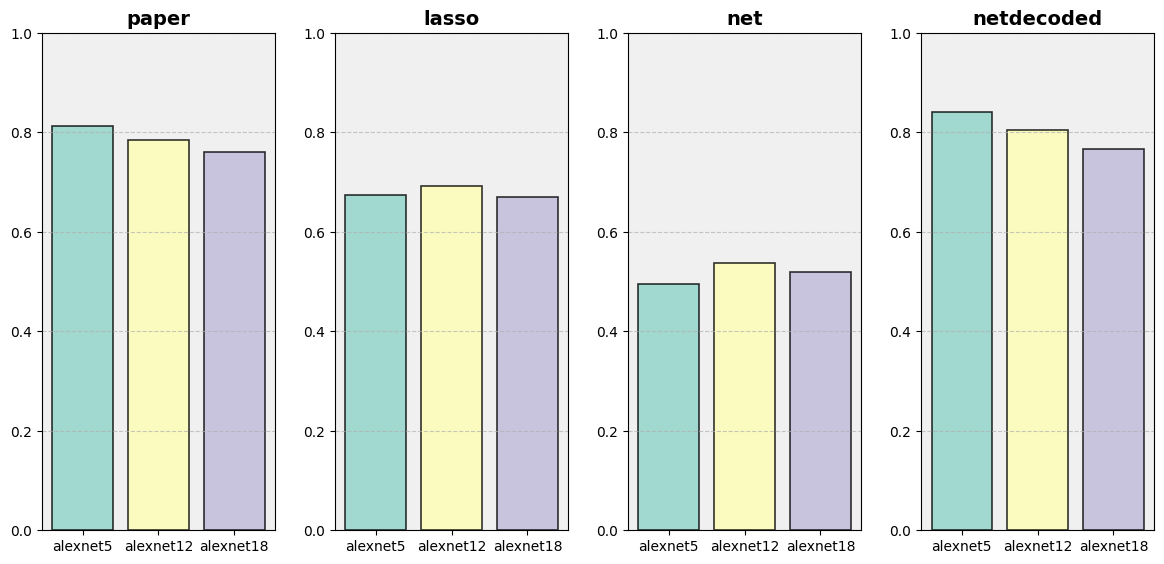

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Your dictionary
data = model_acc_dict

# Extract keys and values for each category
categories = list(data.keys())
models = list(data['paper'].keys())
values = [[data[category][model] for model in models] for category in categories]

# Set color scheme
colors = plt.cm.Set3(np.arange(len(categories)))

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

# Plot each category
for i, ax in enumerate(axes):
    ax.bar(models, values[i], color=colors, edgecolor='black', linewidth=1.2, alpha=0.8)
    ax.set_title(categories[i], fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1)  # Set y-axis limit to 0-1 for better comparison
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_facecolor('#f0f0f0')  # Background color

# Adjust layout
plt.tight_layout(pad=2)
plt.show()


In [10]:
colors

array([[0.65098039, 0.80784314, 0.89019608, 1.        ],
       [0.12156863, 0.47058824, 0.70588235, 1.        ],
       [0.69803922, 0.8745098 , 0.54117647, 1.        ],
       [0.2       , 0.62745098, 0.17254902, 1.        ]])